In [1]:
import pandas as pd

In [2]:
import os

In [3]:
# list files in current directory
os.listdir()

['.atom',
 '.bash_history',
 '.bash_profile',
 '.bash_profile-anaconda3.bak',
 '.bash_sessions',
 '.CFUserTextEncoding',
 '.conda',
 '.cups',
 '.dropbox',
 '.DS_Store',
 '.dvdcss',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.python_history',
 '.Trash',
 '.vscode',
 'Applications',
 'billboard_lyrics_1964-2015.csv',
 'Desktop',
 'Documents',
 'Downloads',
 'Dropbox',
 'Library',
 'lovelove.py',
 'lovewords.ipynb',
 'miniconda3',
 'Movies',
 'Music',
 'Pictures',
 'poplove.ipynb',
 'project',
 'Public',
 'PycharmProjects',
 'temp']

In [4]:
# import data from csv
data = pd.read_csv('billboard_lyrics_1964-2015.csv', encoding='latin-1')

In [5]:
data.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [6]:
# number of entries
data.index

RangeIndex(start=0, stop=5100, step=1)

In [7]:
# experimental
# print(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

In [8]:
word_counts = {}
for lyric in data['Lyrics'].values:
    lyric_string = str(lyric)
    words = lyric_string.split(' ')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [9]:
sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

[('you', 64606),
 ('i', 56466),
 ('the', 53451),
 ('to', 35752),
 ('and', 32555),
 ('me', 31170),
 ('a', 29282),
 ('it', 25688),
 ('my', 22821),
 ('in', 18553),
 ('that', 16151),
 ('on', 15814),
 ('your', 15459),
 ('love', 15283),
 ('im', 14278),
 ('be', 13004),
 ('of', 12825),
 ('', 12266),
 ('all', 11895),
 ('dont', 11587),
 ('know', 11166),
 ('like', 10949),
 ('so', 10545),
 ('for', 10448),
 ('is', 10335),
 ('we', 10331),
 ('oh', 9736),
 ('just', 9577),
 ('do', 9465),
 ('with', 9147),
 ('baby', 9098),
 ('its', 8819),
 ('up', 8722),
 ('but', 8611),
 ('no', 8318),
 ('got', 8289),
 ('get', 8265),
 ('can', 8122),
 ('what', 7927),
 ('when', 7914),
 ('this', 7332),
 ('youre', 6592),
 ('now', 6525),
 ('if', 6459),
 ('yeah', 6259),
 ('want', 6214),
 ('go', 6105),
 ('down', 5686),
 ('make', 5520),
 ('one', 5412),
 ('out', 5381),
 ('cant', 5338),
 ('see', 5264),
 ('time', 5176),
 ('she', 5060),
 ('let', 4927),
 ('come', 4867),
 ('girl', 4803),
 ('wanna', 4767),
 ('say', 4757),
 ('never', 4753

In [10]:
word_counts = {}
for i, lyric in enumerate(data['Lyrics'].values):
    lyric_string = str(lyric)
    words = lyric_string.split(' ')
    word_counts[i] = {}
    for word in words:
        song = word_counts[i]
        if word in song:
            song[word] += 1
        else:
            song[word] = 1

In [11]:
import collections

word_counts_sorted = collections.OrderedDict(word_counts)

In [12]:
print(len(word_counts_sorted))

5100


In [13]:
import pprint as pp

In [14]:
love_songs = []
for i, song in word_counts_sorted.items():
    if 'love' in song.keys():
        love_songs.append(i)
print(len(love_songs))

2723


In [15]:
love_count = 0
for i in love_songs:
    for word, count in word_counts_sorted[i].items():
        if word == 'love':
            love_count += count
print(love_count)

15283


In [16]:
only_love = data.iloc[love_songs]

In [17]:
only_love.head()

,Rank,Song,Artist,Year,Lyrics,Source
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0
12,13,the birds and the bees,jewel akens,1965,let me tell ya bout the birds and the bees and...,3.0
13,14,hold me thrill me kiss me,mel carter,1965,hold me hold me never let me go until youve t...,1.0


In [18]:
# for i in word_counts:
#     word_counts[i] = sorted(word_counts[i].items(), key=lambda x: x[1], reverse=True)

In [19]:
love_count = 0
love_time = {}
for index, song in only_love.iterrows():
    year, lyrics = song['Year'], song['Lyrics']
    if year in love_time:
        love_time[year] += 1
    else:
        love_time[year] = 1
print(love_time)

{1965: 49, 1966: 46, 1967: 54, 1968: 42, 1969: 49, 1970: 50, 1971: 45, 1972: 45, 1973: 40, 1974: 45, 1975: 52, 1976: 51, 1977: 58, 1978: 58, 1979: 62, 1980: 50, 1981: 49, 1982: 56, 1983: 52, 1984: 50, 1985: 54, 1986: 53, 1987: 57, 1988: 68, 1989: 67, 1990: 63, 1991: 62, 1992: 61, 1993: 61, 1994: 58, 1995: 62, 1996: 52, 1997: 49, 1998: 59, 1999: 52, 2000: 61, 2001: 63, 2002: 58, 2003: 57, 2004: 47, 2005: 50, 2006: 43, 2007: 48, 2008: 55, 2009: 47, 2010: 56, 2011: 51, 2012: 45, 2013: 55, 2014: 51, 2015: 55}


In [20]:
import matplotlib.pyplot as plt

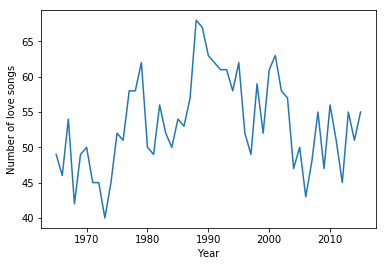

In [21]:
x = love_time.keys()
y = love_time.values()
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of love songs')
plt.show()

In [22]:
love_count = 0
love_time_lyrics = {}
for index, song in only_love.iterrows():
    year, rank, lyrics = song['Year'], song['Rank'], song['Lyrics']
    if year not in love_time_lyrics:
        love_time_lyrics[year] = {}
    
    lyrics_string = str(lyrics)
    words = lyrics_string.split(' ')
    love_time_lyrics[year][rank] = {}
    
    for word in words:
        song = love_time_lyrics[year][rank]
        if word in song:
            song[word] += 1
        else:
            song[word] = 1

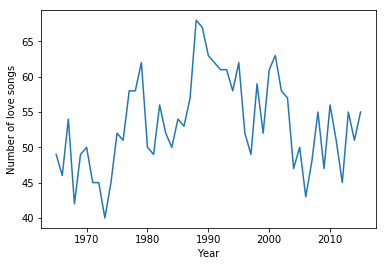

In [23]:
x = love_time_lyrics.keys()
y = [len(year) for year in love_time_lyrics.values()]
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of love songs')
plt.show()

In [24]:
y2 = []
for year in love_time_lyrics.values():
    love_sum = 0
    for song in year.values():
        love_sum += song['love']
    y2.append(love_sum / len(year.values()))

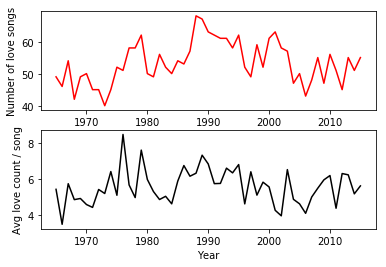

In [25]:
plt.figure()
plt.subplot(211)
plt.plot(x, y, 'r')
plt.ylabel('Number of love songs')
plt.subplot(212)
plt.plot(x, y2, 'k')
plt.ylabel('Avg love count / song')
plt.xlabel('Year')
plt.show()

In [26]:
# find max value
max_avg_love = max(y2)

# get index of max value
max_avg_love_ix = y2.index(max_avg_love)

# get corresponding year (base year + index)
max_avg_love_year = 1965 + max_avg_love_ix
print(max_avg_love_year)

1976


In [27]:
songs_1976 = love_time_lyrics[1976]
love_count_rank = [(rank, song['love']) for rank, song in songs_1976.items()]
max_love_song = max(love_count_rank, key=lambda x: x[1])
rank, love_count = max_love_song
print('Most love 1976: {} (rank {})'.format(love_count, rank))

Most love 1976: 54 (rank 41)


In [28]:
max_love_songs = []
for year in love_time_lyrics.values():
    max_love_song = max([song['love'] for song in year.values()])
    max_love_songs.append(max_love_song)
print('Most love ever: ', max(max_love_songs))

Most love ever:  56
